## In this model I tried with and without punctuation to see if that caracteristic affected much the output or not.

In [1]:
import main
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

## Class of our model

In [2]:
class naive_bayes:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        self.mnb = MultinomialNB()
        self.y_pred = self.mnb.fit(self.X_train, self.y_train).predict(self.X_test)
        self.mislabeled = (self.y_test != self.y_pred).sum()
        self.accuracy = accuracy_score(self.y_test,self.y_pred)
        # print("Number of mislabeled points out of a total %d points : %d"% (self.X_test.shape[0], self.mislabeled))
        # print("Accuracy score: ", self.accuracy)

## Creation of model

In [3]:
def model(n, lines, categories_no_stopwords=[]):
    X_nostopwords = main.vectorize(n, lines, stop_words=False)
    
    if categories_no_stopwords: #since we take out the stop words ourselves for categories
        X_stopwords = main.vectorize(n, categories_no_stopwords, stop_words=False)
    else:
        X_stopwords = main.vectorize(n, lines, stop_words=True)
        
    y = main.labels
    
    return naive_bayes(X_stopwords, y), naive_bayes(X_nostopwords, y)

# Words before and after "interest"

Here are the results of our model with $n$ words before and after "interest" ($n \in 1,...,10$).

In [4]:
words_result = {
                "punctuation": {
                    "stopwords":[],
                    "no_stopwords":[]
                    },
                "no_punctuation":{
                    "stopwords":[],
                    "no_stopwords":[]
                    }
                }

In [5]:
for i in range(1,51):
    stop,nostop = model(i, main.words_only)
    words_result["punctuation"]["stopwords"].append(stop)
    words_result["punctuation"]["no_stopwords"].append(nostop)

for i in range(1,51):
    stop,nostop = model(i, main.words_only_no_punc)
    words_result["no_punctuation"]["stopwords"].append(stop)
    words_result["no_punctuation"]["no_stopwords"].append(nostop)

# Categories of words

Here are the results of our model with the $n$ categories of the words before and after "interest" ($n \in 1,...,10$).

In [6]:
categories_result = {
                    "punctuation": {
                        "stopwords":[],
                        "no_stopwords":[]
                        },
                    "no_punctuation":{
                        "stopwords":[],
                        "no_stopwords":[]
                        }
                    }

In [7]:
for i in range(1,51):
    stop,nostop = model(i, main.categories_only, main.categories_no_stop)
    categories_result["punctuation"]["stopwords"].append(stop)
    categories_result["punctuation"]["no_stopwords"].append(nostop)
    
for i in range(1,51):
    stop,nostop = model(i, main.categories_only_no_punc, main.categories_no_stop_no_punc)
    categories_result["no_punctuation"]["stopwords"].append(stop)
    categories_result["no_punctuation"]["no_stopwords"].append(nostop)

# Graphes

### Words around "interest"

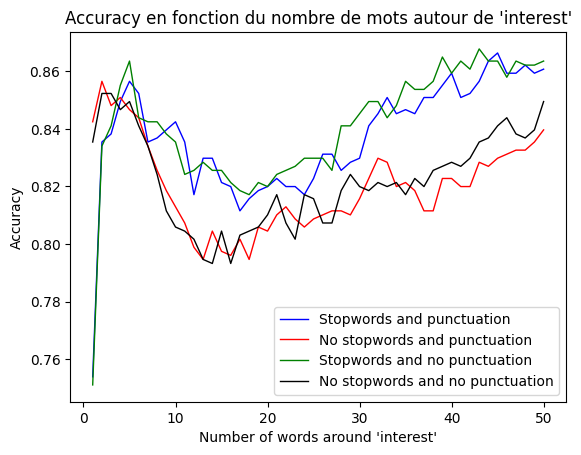

In [12]:
x = range(1, 51)
y1 = [m.accuracy for m in words_result["punctuation"]["stopwords"]]
y2 = [m.accuracy for m in words_result["punctuation"]["no_stopwords"]]
y3 = [m.accuracy for m in words_result["no_punctuation"]["stopwords"]]
y4 = [m.accuracy for m in words_result["no_punctuation"]["no_stopwords"]]

plt.plot(x, y1, marker='', color='blue', linewidth=1, label="Stopwords and punctuation")
plt.plot(x, y2, marker='', color='red', linewidth=1, label="No stopwords and punctuation")
plt.plot(x, y3, marker='', color='green', linewidth=1, label="Stopwords and no punctuation")
plt.plot(x, y4, marker='', color='black', linewidth=1, label="No stopwords and no punctuation")
plt.title("Accuracy en fonction du nombre de mots autour de 'interest'")
plt.xlabel("Number of words around 'interest'")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Categories around "interest"

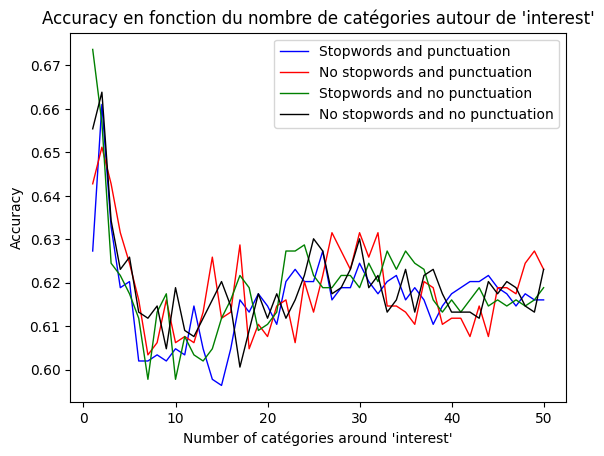

In [13]:
x = range(1, 51)
y1 = [m.accuracy for m in categories_result["punctuation"]["stopwords"]]
y2 = [m.accuracy for m in categories_result["punctuation"]["no_stopwords"]]
y3 = [m.accuracy for m in categories_result["no_punctuation"]["stopwords"]]
y4 = [m.accuracy for m in categories_result["no_punctuation"]["no_stopwords"]]

plt.plot(x, y1, marker='', color='blue', linewidth=1, label="Stopwords and punctuation")
plt.plot(x, y2, marker='', color='red', linewidth=1, label="No stopwords and punctuation")
plt.plot(x, y3, marker='', color='green', linewidth=1, label="Stopwords and no punctuation")
plt.plot(x, y4, marker='', color='black', linewidth=1, label="No stopwords and no punctuation")
plt.title("Accuracy en fonction du nombre de catégories autour de 'interest'")
plt.xlabel("Number of catégories around 'interest'")
plt.ylabel("Accuracy")
plt.legend()
plt.show()